In [1]:
import pandas as pd
import numpy as np


import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation

file = "C:/Users/TYS/Documents/study/Master/INSY662/group project/Real Code/INSY662-Group-Project/Data/dataset_demand.csv"
data = pd.read_csv(file)
data

,date,start_station_cluster,rideable_type,trip_count
0,2022/1/1,0,classic_bike,94
1,2022/1/1,0,electric_bike,196
2,2022/1/1,1,classic_bike,11
3,2022/1/1,1,electric_bike,8
4,2022/1/1,2,classic_bike,37
...,...,...,...,...
12299,2022/12/31,17,electric_bike,189
12300,2022/12/31,18,classic_bike,13
12301,2022/12/31,18,electric_bike,46
12302,2022/12/31,19,classic_bike,9


In [2]:
# Filter data for start_station_cluster 0
#cluster_data = data[data['start_station_cluster'] == 0]

# Separate data for classic bikes and electric bikes
# use data instead of cluster_data
classic_bike_data = data[data['rideable_type'] == 'classic_bike']
electric_bike_data = data[data['rideable_type'] == 'electric_bike']
all_bike_data = data

classic_bike_data.head(), electric_bike_data.head()

(       date  start_station_cluster rideable_type  trip_count
 0  2022/1/1                      0  classic_bike          94
 2  2022/1/1                      1  classic_bike          11
 4  2022/1/1                      2  classic_bike          37
 5  2022/1/1                      3  classic_bike         118
 7  2022/1/1                      4  classic_bike          65,
        date  start_station_cluster  rideable_type  trip_count
 1  2022/1/1                      0  electric_bike         196
 3  2022/1/1                      1  electric_bike           8
 6  2022/1/1                      3  electric_bike         262
 8  2022/1/1                      4  electric_bike          97
 9  2022/1/1                      6  electric_bike           8)

In [3]:
# Convert 'date' to datetime and set as index
classic_bike_data['date'] = pd.to_datetime(classic_bike_data['date'])
electric_bike_data['date'] = pd.to_datetime(electric_bike_data['date'])
all_bike_data['date'] = pd.to_datetime(all_bike_data['date'])
classic_bike_data.set_index('date', inplace=True)
electric_bike_data.set_index('date', inplace=True)
all_bike_data.set_index('date', inplace=True)

# Display the first few rows of each dataset
classic_bike_data.head(), electric_bike_data.head() 

C:\Users\TYS\AppData\Local\Temp\ipykernel_13724\3828104725.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classic_bike_data['date'] = pd.to_datetime(classic_bike_data['date'])
C:\Users\TYS\AppData\Local\Temp\ipykernel_13724\3828104725.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  electric_bike_data['date'] = pd.to_datetime(electric_bike_data['date'])


(            start_station_cluster rideable_type  trip_count
 date                                                       
 2022-01-01                      0  classic_bike          94
 2022-01-01                      1  classic_bike          11
 2022-01-01                      2  classic_bike          37
 2022-01-01                      3  classic_bike         118
 2022-01-01                      4  classic_bike          65,
             start_station_cluster  rideable_type  trip_count
 date                                                        
 2022-01-01                      0  electric_bike         196
 2022-01-01                      1  electric_bike           8
 2022-01-01                      3  electric_bike         262
 2022-01-01                      4  electric_bike          97
 2022-01-01                      6  electric_bike           8)

In [4]:
# Make sure the data is sorted by date
classic_bike_data.sort_index(inplace=True)
electric_bike_data.sort_index(inplace=True)
all_bike_data.sort_index(inplace=True)

# Determine the split point for the classic bike data
split_point_classic = len(classic_bike_data) // 2

# Split the classic bike data into train and test
classic_bike_train = classic_bike_data.iloc[:split_point_classic]
classic_bike_test = classic_bike_data.iloc[split_point_classic:]

# Determine the split point for the electric bike data
split_point_electric = len(electric_bike_data) // 2

# Split the electric bike data into train and test
electric_bike_train = electric_bike_data.iloc[:split_point_electric]
electric_bike_test = electric_bike_data.iloc[split_point_electric:]

split_point_all = len(all_bike_data) // 2

all_bike_train = all_bike_data.iloc[:split_point_all]
all_bike_test = all_bike_data.iloc[split_point_all:]

# You now have the train and test sets for both classic and electric bikes

# Display the first few rows of each dataset
classic_bike_train.head(), electric_bike_train.head(),all_bike_train.head()


(            start_station_cluster rideable_type  trip_count
 date                                                       
 2022-01-01                      0  classic_bike          94
 2022-01-01                      1  classic_bike          11
 2022-01-01                      2  classic_bike          37
 2022-01-01                      3  classic_bike         118
 2022-01-01                      4  classic_bike          65,
             start_station_cluster  rideable_type  trip_count
 date                                                        
 2022-01-01                      0  electric_bike         196
 2022-01-01                      1  electric_bike           8
 2022-01-01                      3  electric_bike         262
 2022-01-01                      4  electric_bike          97
 2022-01-01                      6  electric_bike           8,
             start_station_cluster  rideable_type  trip_count
 date                                                        
 2022-01-01  

In [5]:
from pmdarima import auto_arima
import pandas as pd
from pandas import Timedelta, Timestamp
from statsmodels.tsa.arima.model import ARIMA

# Assuming 'data' is your DataFrame containing all clusters and bike types
clusters = data['start_station_cluster'].unique()
arima_params = {}

for cluster in clusters:
    for bike_type in ['classic_bike', 'electric_bike']:
        # Define the key for storing in the dictionary
        key = (cluster, bike_type)

        # Filter data for the current cluster and bike type
        cluster_bike_data = all_bike_train[(all_bike_train['start_station_cluster'] == cluster) &
                                 (all_bike_train['rideable_type'] == bike_type)]['trip_count'].dropna()

        # Convert the series to float
        cluster_bike_data = cluster_bike_data.astype(float)

        # Convert the index to weekly period
        cluster_bike_data.index = pd.DatetimeIndex(cluster_bike_data.index).to_period('D')

        try:
            # Find the best ARIMA parameters
            model = auto_arima(cluster_bike_data,
                               seasonal=True,
                               trace=True,
                               error_action='warn',
                               suppress_warnings=False,
                               stepwise=True,
                               max_p=3, max_q=3, max_d=2, 
                               max_order=None,
                               enforce_stationarity=True,
                               enforce_invertibility=True,
                               m=12)

            # Store parameters
            arima_params[key] = {
                'order': model.order,
                'seasonal_order': model.seasonal_order,
                'aic': model.aic()
            }

            # Concise output
            print(f"Cluster {cluster} ({bike_type.capitalize()}): ARIMA{model.order}, Seasonal Order={model.seasonal_order}, AIC={model.aic()}")

        except Exception as e:
            print(f"Failed to find ARIMA model for {bike_type} in cluster {cluster}: {e}")

Performing stepwise search to minimize aic


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2054.079, Time=1.46 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2118.268, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2096.615, Time=0.23 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2070.814, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2116.303, Time=0.02 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as startin

 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=1.15 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=inf, Time=1.16 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=inf, Time=2.69 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=inf, Time=2.60 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.56 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=inf, Time=2.24 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=2053.071, Time=2.51 sec
 ARIMA(1,1,2)(2,0,0)[12] intercept   : AIC=2062.513, Time=1.63 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,1)(2,0,0)[12] intercept   : AIC=2062.408, Time=2.09 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(3,1,2)(2,0,0)[12] intercept   : AIC=2054.843, Time=2.61 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,3)(2,0,0)[12] intercept   : AIC=2055.071, Time=2.80 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=2060.650, Time=1.62 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(1,1,3)(2,0,0)[12] intercept   : AIC=2053.987, Time=2.21 sec
 ARIMA(3,1,1)(2,0,0)[12] intercept   : AIC=2062.493, Time=2.14 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(3,1,3)(2,0,0)[12] intercept   : AIC=inf, Time=3.20 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,2)(2,0,0)[12]             : AIC=inf, Time=2.02 sec

Best model:  ARIMA(2,1,2)(2,0,0)[12] intercept
Total fit time: 35.252 seconds
Cluster 0 (Classic_bike): ARIMA(2, 1, 2), Seasonal Order=(2, 0, 0, 12), AIC=2053.071329574367
Performing stepwise search to minimize aic


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.51 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2263.338, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2255.683, Time=0.21 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2261.370, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=2260.809, Time=0.03 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=2232.683, Time=0.61 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=2234.519, Time=1.73 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=2250.673, Time=0.62 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=2250.272, Time=0.56 sec
 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=2225.533, Time=1.60 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=2255.749, Time=0.41 sec
 ARIMA(2,1,0)(2,0,1)[12] intercept   : AIC=2227.199, Time=1.99 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=2250.490, Time=0.83 sec
 ARIMA(3,1,0)(2,0,0)[12] intercept   : AIC=2216.738, Time=2.14 sec
 ARIM

c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,1)(2,0,0)[12] intercept   : AIC=inf, Time=1.46 sec
 ARIMA(3,1,0)(2,0,0)[12]             : AIC=2215.724, Time=0.60 sec
 ARIMA(3,1,0)(1,0,0)[12]             : AIC=2236.450, Time=0.24 sec
 ARIMA(3,1,0)(2,0,1)[12]             : AIC=2217.419, Time=0.80 sec
 ARIMA(3,1,0)(1,0,1)[12]             : AIC=2233.813, Time=0.43 sec
 ARIMA(2,1,0)(2,0,0)[12]             : AIC=2224.127, Time=0.54 sec
 ARIMA(3,1,1)(2,0,0)[12]             : AIC=2192.180, Time=1.13 sec
 ARIMA(3,1,1)(1,0,0)[12]             : AIC=2191.862, Time=0.36 sec
 ARIMA(3,1,1)(0,0,0)[12]             : AIC=2197.766, Time=0.20 sec
 ARIMA(3,1,1)(1,0,1)[12]             : AIC=2193.265, Time=0.55 sec
 ARIMA(3,1,1)(0,0,1)[12]             : AIC=2191.265, Time=0.48 sec
 ARIMA(3,1,1)(0,0,2)[12]             : AIC=2193.265, Time=1.12 sec
 ARIMA(3,1,1)(1,0,2)[12]             : AIC=2194.084, Time=1.80 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,1)(0,0,1)[12]             : AIC=2207.777, Time=0.50 sec
 ARIMA(3,1,0)(0,0,1)[12]             : AIC=2232.784, Time=0.28 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(3,1,2)(0,0,1)[12]             : AIC=2164.896, Time=1.35 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(3,1,2)(0,0,0)[12]             : AIC=2169.810, Time=0.61 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(3,1,2)(1,0,1)[12]             : AIC=2164.194, Time=1.37 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(3,1,2)(1,0,0)[12]             : AIC=2162.975, Time=1.11 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(3,1,2)(2,0,0)[12]             : AIC=2192.290, Time=2.30 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(3,1,2)(2,0,1)[12]             : AIC=2193.813, Time=2.51 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,2)(1,0,0)[12]             : AIC=inf, Time=1.21 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(3,1,3)(1,0,0)[12]             : AIC=inf, Time=1.53 sec
 ARIMA(2,1,1)(1,0,0)[12]             : AIC=2210.369, Time=0.48 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,3)(1,0,0)[12]             : AIC=inf, Time=1.16 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(3,1,2)(1,0,0)[12] intercept   : AIC=2164.416, Time=1.52 sec

Best model:  ARIMA(3,1,2)(1,0,0)[12]          
Total fit time: 45.100 seconds
Cluster 0 (Electric_bike): ARIMA(3, 1, 2), Seasonal Order=(1, 0, 0, 12), AIC=2162.9745505967853
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1255.236, Time=1.09 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1341.424, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1305.565, Time=0.18 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1249.141, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1339.448, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1247.183, Time=0.18 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1249.144, Time=0.18 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1251.077, Time=0.54 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1247.864, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=1247.786, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=13

c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=1249.305, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=1247.369, Time=0.05 sec

Best model:  ARIMA(0,1,1)(0,0,0)[12] intercept
Total fit time: 2.964 seconds
Cluster 1 (Classic_bike): ARIMA(0, 1, 1), Seasonal Order=(0, 0, 0, 12), AIC=1247.1831601606
Performing stepwise search to minimize aic


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.45 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1015.649, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1019.007, Time=0.34 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1018.843, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1402.448, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=1017.234, Time=0.18 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=1017.071, Time=0.09 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=1017.862, Time=0.57 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1017.418, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=1017.419, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=1019.416, Time=0.08 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 2.985 seconds
Cluster 1 (Electric_bike): ARIMA(0, 0, 0), Seasonal Order=(0, 0, 0, 12), AIC=1015.6493122039806
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1490.909

c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.60 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=1486.211, Time=0.15 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=1510.014, Time=0.09 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=1489.607, Time=0.37 sec
 ARIMA(1,1,1)(0,0,0)[12]             : AIC=1489.639, Time=0.08 sec

Best model:  ARIMA(1,1,1)(0,0,0)[12] intercept
Total fit time: 9.095 seconds
Cluster 2 (Classic_bike): ARIMA(1, 1, 1), Seasonal Order=(0, 0, 0, 12), AIC=1485.6953532642056
Failed to find ARIMA model for electric_bike in cluster 2: Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1888.875, Time=1.27 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1947.493, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1922.602, Time=0.22 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1899.940, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1945.498

c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(0,1,2)(1,0,2)[12] intercept   : AIC=inf, Time=2.23 sec
 ARIMA(0,1,3)(0,0,1)[12] intercept   : AIC=1885.845, Time=0.57 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=1885.138, Time=0.55 sec
 ARIMA(1,1,3)(0,0,1)[12] intercept   : AIC=1887.125, Time=1.02 sec
 ARIMA(0,1,2)(0,0,1)[12]             : AIC=1884.333, Time=0.26 sec

Best model:  ARIMA(0,1,2)(0,0,1)[12] intercept
Total fit time: 20.700 seconds
Cluster 3 (Classic_bike): ARIMA(0, 1, 2), Seasonal Order=(0, 0, 1, 12), AIC=1884.3201198536794
Performing stepwise search to minimize aic


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2102.018, Time=1.50 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2169.350, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2149.560, Time=0.28 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2119.746, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2167.371, Time=0.02 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=2100.217, Time=1.60 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=2116.431, Time=0.58 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=2101.971, Time=2.28 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=2100.971, Time=1.05 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=inf, Time=2.68 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=0.60 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=1.07 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(3,1,2)(0,0,1)[12] intercept   : AIC=2095.581, Time=1.23 sec
 ARIMA(3,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.56 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(3,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.38 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(3,1,2)(0,0,2)[12] intercept   : AIC=inf, Time=2.55 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(3,1,2)(1,0,0)[12] intercept   : AIC=2101.015, Time=1.31 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(3,1,2)(1,0,2)[12] intercept   : AIC=inf, Time=2.84 sec
 ARIMA(3,1,1)(0,0,1)[12] intercept   : AIC=2100.799, Time=0.99 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(3,1,3)(0,0,1)[12] intercept   : AIC=2097.647, Time=1.71 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,3)(0,0,1)[12] intercept   : AIC=inf, Time=1.47 sec
 ARIMA(3,1,2)(0,0,1)[12]             : AIC=2098.922, Time=1.05 sec

Best model:  ARIMA(3,1,2)(0,0,1)[12] intercept
Total fit time: 27.234 seconds
Cluster 3 (Electric_bike): ARIMA(3, 1, 2), Seasonal Order=(0, 0, 1, 12), AIC=2095.5811839845583
Performing stepwise search to minimize aic


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.44 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1813.783, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1800.889, Time=0.20 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1750.864, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1811.783, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1757.437, Time=0.15 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1751.883, Time=0.76 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=1748.150, Time=1.23 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=1744.434, Time=1.99 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(0,1,1)(2,0,2)[12] intercept   : AIC=inf, Time=2.41 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=1740.205, Time=1.91 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=1740.748, Time=1.19 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1754.332, Time=0.67 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.77 sec
 ARIMA(1,1,1)(2,0,1)[12] intercept   : AIC=inf, Time=1.65 sec
 ARIMA(0,1,2)(2,0,1)[12] intercept   : AIC=1735.891, Time=1.08 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(0,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.25 sec
 ARIMA(0,1,2)(2,0,0)[12] intercept   : AIC=1735.862, Time=0.75 sec
 ARIMA(0,1,2)(1,0,0)[12] intercept   : AIC=inf, Time=0.65 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(1,1,2)(2,0,0)[12] intercept   : AIC=1737.860, Time=1.03 sec
 ARIMA(0,1,3)(2,0,0)[12] intercept   : AIC=1737.859, Time=0.88 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=inf, Time=0.78 sec
 ARIMA(1,1,3)(2,0,0)[12] intercept   : AIC=1735.932, Time=1.58 sec
 ARIMA(0,1,2)(2,0,0)[12]             : AIC=1736.432, Time=0.62 sec

Best model:  ARIMA(0,1,2)(2,0,0)[12] intercept
Total fit time: 24.610 seconds
Cluster 4 (Classic_bike): ARIMA(0, 1, 2), Seasonal Order=(2, 0, 0, 12), AIC=1735.861534715123
Performing stepwise search to minimize aic


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.43 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1886.471, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1866.124, Time=0.36 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1884.471, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1886.292, Time=0.07 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=1853.447, Time=0.68 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=1853.215, Time=0.88 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=1854.062, Time=0.40 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=2.57 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=inf, Time=1.56 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=1860.735, Time=1.04 sec
 ARIMA(2,1,0)(2,0,1)[12] intercept   : AIC=1837.888, Time=1.64 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=1847.217, Time=0.94 sec
 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=1836.795, Time=1.52 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=1861.155, Time=0.44 sec
 ARIMA(3,1,0)(2,0,0)[12] intercept   : AIC=1827.788, Time=1.73 sec
 ARIMA(3,1,0)(1,0,0)[12] intercept   : AIC=1846.458, Time=0.39 sec
 ARIMA(3,1,0)(2,0,1)[12] intercept   : AIC=1829.160, Time=1.90 sec
 ARIMA(3,1,0)(1,0,1)[12] intercept   : AIC=1836.590, Time=0.99 sec
 ARIMA(3,1,1)(2,0,0)[12] intercept   : AIC=inf, Time=1.64 sec
 ARIMA(2,1,1)(2,0,0)[12] intercept   : AIC=inf, Time=1.15 sec
 ARIMA(3,1,0)(2,0,0)[12]             : AIC=1825.934, Time=0.66 sec
 ARIMA(3,1,0)(1,0,0)[12]             : AIC=1844.489, Time=0.29 sec
 ARIMA(3,1,0)(2

c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(3,1,2)(0,0,1)[12]             : AIC=1780.967, Time=0.97 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(3,1,2)(0,0,0)[12]             : AIC=1805.521, Time=0.45 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(3,1,2)(1,0,1)[12]             : AIC=1782.370, Time=1.52 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(3,1,2)(0,0,2)[12]             : AIC=1782.676, Time=1.95 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(3,1,2)(1,0,0)[12]             : AIC=1780.517, Time=0.72 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(3,1,2)(2,0,0)[12]             : AIC=1782.473, Time=1.67 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as startin

 ARIMA(3,1,2)(2,0,1)[12]             : AIC=inf, Time=3.03 sec
 ARIMA(2,1,2)(1,0,0)[12]             : AIC=1784.530, Time=0.72 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(3,1,3)(1,0,0)[12]             : AIC=inf, Time=1.66 sec
 ARIMA(2,1,1)(1,0,0)[12]             : AIC=1799.604, Time=0.38 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,3)(1,0,0)[12]             : AIC=1741.579, Time=1.30 sec
 ARIMA(2,1,3)(0,0,0)[12]             : AIC=inf, Time=0.65 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,3)(2,0,0)[12]             : AIC=inf, Time=3.03 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,3)(1,0,1)[12]             : AIC=1746.025, Time=1.91 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,3)(0,0,1)[12]             : AIC=inf, Time=1.53 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,3)(2,0,1)[12]             : AIC=inf, Time=3.42 sec
 ARIMA(1,1,3)(1,0,0)[12]             : AIC=1805.899, Time=0.50 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(1,1,2)(1,0,0)[12]             : AIC=1808.062, Time=0.36 sec
 ARIMA(2,1,3)(1,0,0)[12] intercept   : AIC=inf, Time=1.13 sec

Best model:  ARIMA(2,1,3)(1,0,0)[12]          
Total fit time: 61.127 seconds
Cluster 4 (Electric_bike): ARIMA(2, 1, 3), Seasonal Order=(1, 0, 0, 12), AIC=1741.5791963567485
Performing stepwise search to minimize aic


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.36 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=939.030, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=921.164, Time=0.13 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=937.032, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=919.410, Time=0.04 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=921.091, Time=0.13 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.89 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=905.046, Time=0.07 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=907.045, Time=0.16 sec
 ARIMA(2,1,0)(0,0,1)[12] intercept   : AIC=907.045, Time=0.18 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=1.00 sec
 ARIMA(3,1,0)(0,0,0)[12] intercept   : AIC=897.946, Time=0.10 sec
 ARIMA(3,1,0)(1,0,0)[12] intercept   : AIC=899.915, Time=0.20 sec
 ARIMA(3,1,0)(0,0,1)[12] intercept   : AIC=899.898, Time=0.25 sec
 ARIMA(3,1,0)(1,0,1)[12] i

c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(3,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(3,1,0)(0,0,0)[12]             : AIC=895.963, Time=0.06 sec
 ARIMA(3,1,0)(1,0,0)[12]             : AIC=897.932, Time=0.13 sec
 ARIMA(3,1,0)(0,0,1)[12]             : AIC=897.914, Time=0.15 sec
 ARIMA(3,1,0)(1,0,1)[12]             : AIC=898.820, Time=0.45 sec
 ARIMA(2,1,0)(0,0,0)[12]             : AIC=903.056, Time=0.04 sec
 ARIMA(3,1,1)(0,0,0)[12]             : AIC=867.709, Time=0.17 sec
 ARIMA(3,1,1)(1,0,0)[12]             : AIC=869.707, Time=0.35 sec
 ARIMA(3,1,1)(0,0,1)[12]             : AIC=869.707, Time=0.40 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(3,1,1)(1,0,1)[12]             : AIC=inf, Time=1.09 sec
 ARIMA(2,1,1)(0,0,0)[12]             : AIC=865.709, Time=0.10 sec
 ARIMA(2,1,1)(1,0,0)[12]             : AIC=867.708, Time=0.26 sec
 ARIMA(2,1,1)(0,0,1)[12]             : AIC=867.707, Time=0.25 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,1)(1,0,1)[12]             : AIC=inf, Time=1.00 sec
 ARIMA(1,1,1)(0,0,0)[12]             : AIC=864.269, Time=0.08 sec
 ARIMA(1,1,1)(1,0,0)[12]             : AIC=866.257, Time=0.19 sec
 ARIMA(1,1,1)(0,0,1)[12]             : AIC=866.252, Time=0.23 sec
 ARIMA(1,1,1)(1,0,1)[12]             : AIC=inf, Time=0.80 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=872.635, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[12]             : AIC=917.415, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[12]             : AIC=865.748, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[12]             : AIC=863.786, Time=0.08 sec
 ARIMA(0,1,2)(1,0,0)[12]             : AIC=865.786, Time=0.19 sec
 ARIMA(0,1,2)(0,0,1)[12]             : AIC=865.786, Time=0.15 sec
 ARIMA(0,1,2)(1,0,1)[12]             : AIC=inf, Time=0.84 sec
 ARIMA(0,1,3)(0,0,0)[12]             : AIC=865.742, Time=0.10 sec
 ARIMA(1,1,3)(0,0,0)[12]             : AIC=866.015, Time=0.22 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.27 sec

Best model:  ARIMA(0,1,2)

c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.49 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1186.978, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1145.760, Time=0.17 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1097.170, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1185.005, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1097.974, Time=0.07 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1098.434, Time=0.32 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=1097.587, Time=0.49 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1097.790, Time=0.19 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=1098.512, Time=0.92 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1188.349, Time=0.11 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=1099.168, Time=0.32 sec
 ARIMA(0,1,2)(0,0,1)[12] intercept   : AIC=1099.168, Time=0.29 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=1145.284, Time=0.19 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=1097.530, Time=0.42 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1875.623, Time=1.35 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1947.630, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1929.413, Time=0.24 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1885.735, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1945.630, Time=0.01 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=1873.626, Time=1.09 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=1878.377, Time=0.46 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=1875.620, Time=2.09 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=1874.155, Time=1.06 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=inf, Time=2.67 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=1874.415, Time=0.67 sec
 ARIMA(2,1,1)(0,0,1)[12] intercept   : AIC=1873.378, Time=0.77 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=1876.954, Time=0.22 sec
 ARIMA(2,1,1)(1,0,1)[12] intercept   : AIC=1875.320, Time=1.26 sec
 ARIMA(2,1,1)(0,0,2)[12] intercept   : AIC=1875.259, Time=1.15 sec
 ARIMA(2,1,1)(1,0,0)[12] intercept   : AIC=1874.028, Time=0.64 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=2.70 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(2,1,0)(0,0,1)[12] intercept   : AIC=1914.074, Time=0.31 sec
 ARIMA(3,1,1)(0,0,1)[12] intercept   : AIC=1875.046, Time=0.83 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=1928.227, Time=0.24 sec
 ARIMA(3,1,0)(0,0,1)[12] intercept   : AIC=1907.540, Time=0.43 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as startin

 ARIMA(3,1,2)(0,0,1)[12] intercept   : AIC=1871.719, Time=1.24 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(3,1,2)(0,0,0)[12] intercept   : AIC=1878.501, Time=0.63 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(3,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.50 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(3,1,2)(0,0,2)[12] intercept   : AIC=1872.505, Time=2.53 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(3,1,2)(1,0,0)[12] intercept   : AIC=1873.569, Time=1.27 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(3,1,2)(1,0,2)[12] intercept   : AIC=inf, Time=2.91 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(3,1,3)(0,0,1)[12] intercept   : AIC=inf, Time=1.77 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,3)(0,0,1)[12] intercept   : AIC=1871.566, Time=1.48 sec
 ARIMA(2,1,3)(0,0,0)[12] intercept   : AIC=1879.749, Time=0.51 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,3)(1,0,1)[12] intercept   : AIC=inf, Time=1.59 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,3)(0,0,2)[12] intercept   : AIC=1871.331, Time=2.99 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,3)(1,0,2)[12] intercept   : AIC=inf, Time=3.32 sec
 ARIMA(1,1,3)(0,0,2)[12] intercept   : AIC=inf, Time=2.32 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(3,1,3)(0,0,2)[12] intercept   : AIC=inf, Time=3.01 sec
 ARIMA(1,1,2)(0,0,2)[12] intercept   : AIC=1876.270, Time=1.55 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,3)(0,0,2)[12]             : AIC=1874.293, Time=2.95 sec

Best model:  ARIMA(2,1,3)(0,0,2)[12] intercept
Total fit time: 50.545 seconds
Cluster 7 (Classic_bike): ARIMA(2, 1, 3), Seasonal Order=(0, 0, 2, 12), AIC=1871.3312556827427
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.25 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2107.436, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2095.563, Time=0.23 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2105.441, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=2098.113, Time=0.06 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=2088.386, Time=0.58 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=2090.075, Time=0.77 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=2093.675, Time=0.41 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=2104.295, Time=0.41 sec
 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=2074.277, Tim

c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(1,1,2)(2,0,0)[12]             : AIC=2050.517, Time=0.92 sec
 ARIMA(0,1,0)(2,0,0)[12]             : AIC=2102.314, Time=0.23 sec
 ARIMA(0,1,2)(2,0,0)[12]             : AIC=2048.652, Time=0.62 sec
 ARIMA(0,1,2)(1,0,0)[12]             : AIC=2053.913, Time=0.28 sec
 ARIMA(0,1,2)(2,0,1)[12]             : AIC=2050.164, Time=0.69 sec
 ARIMA(0,1,2)(1,0,1)[12]             : AIC=2053.169, Time=0.45 sec
 ARIMA(0,1,3)(2,0,0)[12]             : AIC=2050.516, Time=0.71 sec
 ARIMA(1,1,3)(2,0,0)[12]             : AIC=2052.514, Time=1.38 sec
 ARIMA(0,1,2)(2,0,0)[12] intercept   : AIC=inf, Time=0.83 sec

Best model:  ARIMA(0,1,2)(2,0,0)[12]          
Total fit time: 35.426 seconds
Cluster 7 (Electric_bike): ARIMA(0, 1, 2), Seasonal Order=(2, 0, 0, 12), AIC=2048.6520857784253
Performing stepwise search to minimize aic


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.39 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1149.050, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1116.466, Time=0.16 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.96 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1147.092, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1114.536, Time=0.05 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=1116.457, Time=0.16 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.99 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=1103.167, Time=0.10 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=1105.164, Time=0.30 sec
 ARIMA(2,1,0)(0,0,1)[12] intercept   : AIC=1105.163, Time=0.20 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(3,1,0)(0,0,0)[12] intercept   : AIC=1092.091, Time=0.15 sec
 ARIMA(3,1,0)(1,0,0)[12] intercept   : AIC=1094.040, Time=0.31 sec
 ARIMA(3,1,0)(0,0,1)[12] intercept   : AIC=1094.027, Time=0.28 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(3,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=1.29 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(3,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.56 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(3,1,0)(0,0,0)[12]             : AIC=1090.158, Time=0.08 sec
 ARIMA(3,1,0)(1,0,0)[12]             : AIC=1092.108, Time=0.15 sec
 ARIMA(3,1,0)(0,0,1)[12]             : AIC=1092.094, Time=0.14 sec
 ARIMA(3,1,0)(1,0,1)[12]             : AIC=inf, Time=1.01 sec
 ARIMA(2,1,0)(0,0,0)[12]             : AIC=1101.233, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[12]             : AIC=1060.804, Time=0.30 sec
 ARIMA(3,1,1)(1,0,0)[12]             : AIC=1062.782, Time=0.38 sec
 ARIMA(3,1,1)(0,0,1)[12]             : AIC=1062.780, Time=0.34 sec
 ARIMA(3,1,1)(1,0,1)[12]             : AIC=1064.804, Time=0.47 sec
 ARIMA(2,1,1)(0,0,0)[12]             : AIC=1059.342, Time=0.13 sec
 ARIMA(2,1,1)(1,0,0)[12]             : AIC=1061.327, Time=0.44 sec
 ARIMA(2,1,1)(0,0,1)[12]             : AIC=1061.325, Time=0.41 sec
 ARIMA(2,1,1)(1,0,1)[12]             : AIC=1063.276, Time=0.78 sec
 ARIMA(1,1

c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(1,1,1)(1,0,1)[12]             : AIC=inf, Time=0.94 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=1057.215, Time=0.05 sec
 ARIMA(0,1,1)(1,0,0)[12]             : AIC=1059.204, Time=0.13 sec
 ARIMA(0,1,1)(0,0,1)[12]             : AIC=1059.202, Time=0.15 sec
 ARIMA(0,1,1)(1,0,1)[12]             : AIC=inf, Time=0.65 sec
 ARIMA(0,1,2)(0,0,0)[12]             : AIC=1057.374, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[12]             : AIC=1112.597, Time=0.03 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(1,1,2)(0,0,0)[12]             : AIC=1059.371, Time=0.21 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.21 sec

Best model:  ARIMA(0,1,1)(0,0,0)[12]          
Total fit time: 15.795 seconds
Cluster 8 (Classic_bike): ARIMA(0, 1, 1), Seasonal Order=(0, 0, 0, 12), AIC=1057.214875754571
Performing stepwise search to minimize aic


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.36 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1162.014, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1142.710, Time=0.18 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.66 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1160.056, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1141.324, Time=0.04 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=1142.718, Time=0.18 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=1144.710, Time=0.31 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=1116.439, Time=0.08 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=1117.977, Time=0.26 sec
 ARIMA(2,1,0)(0,0,1)[12] intercept   : AIC=1118.002, Time=0.24 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=1119.955, Time=0.39 sec
 ARIMA(3,1,0)(0,0,0)[12] intercept   : AIC=1114.918, Time=0.13 sec
 ARIMA(3,1,0)(1,0,0)[12] intercept   : AIC=1116.466, Time=0.32 sec
 ARIMA(3,1,0)(0,0,1)[12] intercept   : AIC=1116.492, Time=0.30 sec
 ARIM

c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(3,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.63 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(3,1,0)(0,0,0)[12]             : AIC=1113.028, Time=0.06 sec
 ARIMA(3,1,0)(1,0,0)[12]             : AIC=1114.577, Time=0.13 sec
 ARIMA(3,1,0)(0,0,1)[12]             : AIC=1114.603, Time=0.15 sec
 ARIMA(3,1,0)(1,0,1)[12]             : AIC=1116.549, Time=0.34 sec
 ARIMA(2,1,0)(0,0,0)[12]             : AIC=1114.523, Time=0.04 sec
 ARIMA(3,1,1)(0,0,0)[12]             : AIC=1085.474, Time=0.18 sec
 ARIMA(3,1,1)(1,0,0)[12]             : AIC=1087.382, Time=0.41 sec
 ARIMA(3,1,1)(0,0,1)[12]             : AIC=1087.380, Time=0.38 sec
 ARIMA(3,1,1)(1,0,1)[12]             : AIC=1089.379, Time=0.76 sec
 ARIMA(2,1,1)(0,0,0)[12]             : AIC=1085.109, Time=0.11 sec
 ARIMA(2,1,1)(1,0,0)[12]             : AIC=1087.031, Time=0.30 sec
 ARIMA(2,1,1)(0,0,1)[12]             : AIC=1087.027, Time=0.31 sec
 ARIMA(2,1,1)(1,0,1)[12]             : AIC=1088.841, Time=0.90 sec
 ARIMA(1,1,1)(0,0,0)[12]             : AIC=1084.157, Time=0.08 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.32 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1698.646, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1678.180, Time=0.28 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.70 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1696.677, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1682.086, Time=0.06 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=1679.676, Time=0.64 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=1679.899, Time=0.42 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=1679.044, Time=0.20 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=1680.934, Time=1.01 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1698.023, Time=0.16 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=1668.882, Time=0.36 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=1671.661, Time=0.10 sec
 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=1670.536, Time=0.97 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=1670.686, Time=0.44 sec
 ARIM

c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,0)(1,0,2)[12] intercept   : AIC=inf, Time=1.96 sec
 ARIMA(3,1,0)(0,0,1)[12] intercept   : AIC=1662.748, Time=0.27 sec
 ARIMA(3,1,0)(0,0,0)[12] intercept   : AIC=1664.623, Time=0.12 sec
 ARIMA(3,1,0)(1,0,1)[12] intercept   : AIC=1664.469, Time=0.65 sec
 ARIMA(3,1,0)(0,0,2)[12] intercept   : AIC=1664.148, Time=0.67 sec
 ARIMA(3,1,0)(1,0,0)[12] intercept   : AIC=1662.486, Time=0.48 sec
 ARIMA(3,1,0)(2,0,0)[12] intercept   : AIC=1664.452, Time=1.06 sec
 ARIMA(3,1,0)(2,0,1)[12] intercept   : AIC=1666.102, Time=1.68 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(3,1,1)(1,0,0)[12] intercept   : AIC=inf, Time=1.16 sec
 ARIMA(2,1,1)(1,0,0)[12] intercept   : AIC=inf, Time=0.96 sec
 ARIMA(3,1,0)(1,0,0)[12]             : AIC=1660.795, Time=0.18 sec
 ARIMA(3,1,0)(0,0,0)[12]             : AIC=1662.840, Time=0.08 sec
 ARIMA(3,1,0)(2,0,0)[12]             : AIC=1662.752, Time=0.43 sec
 ARIMA(3,1,0)(1,0,1)[12]             : AIC=1662.774, Time=0.37 sec
 ARIMA(3,1,0)(0,0,1)[12]             : AIC=1661.059, Time=0.19 sec
 ARIMA(3,1,0)(2,0,1)[12]             : AIC=1664.376, Time=1.01 sec
 ARIMA(2,1,0)(1,0,0)[12]             : AIC=1667.099, Time=0.16 sec
 ARIMA(3,1,1)(1,0,0)[12]             : AIC=1629.623, Time=0.37 sec
 ARIMA(3,1,1)(0,0,0)[12]             : AIC=1632.028, Time=0.17 sec
 ARIMA(3,1,1)(2,0,0)[12]             : AIC=1630.376, Time=0.72 sec
 ARIMA(3,1,1)(1,0,1)[12]             : AIC=1631.055, Time=0.68 sec
 ARIMA(3,1,1)(0,0,1)[12]             : AIC=1630.358, Time=0.41 sec
 ARIMA(3,1,1)(2,0,1)[12]             : AIC=1631.490, Time=1.32 sec
 ARIM

c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(3,1,2)(1,0,0)[12]             : AIC=1632.010, Time=0.56 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,2)(1,0,0)[12]             : AIC=1628.126, Time=0.90 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,2)(0,0,0)[12]             : AIC=1630.879, Time=0.30 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,2)(2,0,0)[12]             : AIC=1634.402, Time=1.16 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,2)(1,0,1)[12]             : AIC=1634.563, Time=0.90 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,2)(0,0,1)[12]             : AIC=1628.742, Time=0.72 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,2)(2,0,1)[12]             : AIC=1635.356, Time=1.66 sec
 ARIMA(1,1,2)(1,0,0)[12]             : AIC=1630.334, Time=0.30 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,3)(1,0,0)[12]             : AIC=1623.214, Time=1.23 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,3)(0,0,0)[12]             : AIC=1624.676, Time=0.69 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,3)(2,0,0)[12]             : AIC=1622.491, Time=2.45 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,3)(2,0,1)[12]             : AIC=1623.734, Time=3.19 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,3)(1,0,1)[12]             : AIC=1623.629, Time=1.68 sec
 ARIMA(1,1,3)(2,0,0)[12]             : AIC=1632.369, Time=1.06 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(3,1,3)(2,0,0)[12]             : AIC=1631.758, Time=2.26 sec
 ARIMA(1,1,2)(2,0,0)[12]             : AIC=1632.191, Time=0.71 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(3,1,2)(2,0,0)[12]             : AIC=1633.264, Time=1.14 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,3)(2,0,0)[12] intercept   : AIC=inf, Time=3.15 sec

Best model:  ARIMA(2,1,3)(2,0,0)[12]          
Total fit time: 47.020 seconds
Cluster 9 (Classic_bike): ARIMA(2, 1, 3), Seasonal Order=(2, 0, 0, 12), AIC=1622.4905583552863
Failed to find ARIMA model for electric_bike in cluster 9: Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
Performing stepwise search to minimize aic


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1397.994, Time=1.29 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1508.715, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1452.218, Time=0.26 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1394.997, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1506.735, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1394.149, Time=0.07 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1395.003, Time=0.19 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1397.019, Time=0.24 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1394.275, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=1393.819, Time=0.10 sec
 ARIMA(0,1,2)(1,0,0)[12] intercept   : AIC=1394.602, Time=0.21 sec
 ARIMA(0,1,2)(0,0,1)[12] intercept   : AIC=1394.608, Time=0.27 sec
 ARIMA(0,1,2)(1,0,1)[12] intercept   : AIC=1395.983, Time=0.55 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(0,1,3)(0,0,0)[12] intercept   : AIC=1394.209, Time=0.18 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2027.143, Time=1.33 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2099.372, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2067.578, Time=0.34 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2033.875, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2097.378, Time=0.02 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=2025.281, Time=1.06 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=2031.154, Time=0.39 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as startin

 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=2026.985, Time=2.18 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=2025.414, Time=1.10 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=inf, Time=2.59 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=2033.545, Time=0.69 sec
 ARIMA(2,1,1)(0,0,1)[12] intercept   : AIC=2033.524, Time=0.57 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(3,1,2)(0,0,1)[12] intercept   : AIC=2026.490, Time=1.27 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,3)(0,0,1)[12] intercept   : AIC=2025.034, Time=1.43 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,3)(0,0,0)[12] intercept   : AIC=2031.587, Time=0.70 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,3)(1,0,1)[12] intercept   : AIC=2026.851, Time=1.63 sec
 ARIMA(2,1,3)(0,0,2)[12] intercept   : AIC=2026.691, Time=2.56 sec
 ARIMA(2,1,3)(1,0,0)[12] intercept   : AIC=2025.152, Time=1.09 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,3)(1,0,2)[12] intercept   : AIC=2027.732, Time=3.41 sec
 ARIMA(1,1,3)(0,0,1)[12] intercept   : AIC=2023.778, Time=1.11 sec
 ARIMA(1,1,3)(0,0,0)[12] intercept   : AIC=2030.111, Time=0.43 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(1,1,3)(1,0,1)[12] intercept   : AIC=2025.624, Time=1.38 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(1,1,3)(0,0,2)[12] intercept   : AIC=2025.450, Time=2.54 sec
 ARIMA(1,1,3)(1,0,0)[12] intercept   : AIC=2023.890, Time=1.35 sec
 ARIMA(1,1,3)(1,0,2)[12] intercept   : AIC=inf, Time=2.97 sec
 ARIMA(0,1,3)(0,0,1)[12] intercept   : AIC=2033.488, Time=0.71 sec
 ARIMA(0,1,2)(0,0,1)[12] intercept   : AIC=2032.011, Time=0.49 sec
 ARIMA(1,1,3)(0,0,1)[12]             : AIC=2025.800, Time=0.80 sec

Best model:  ARIMA(1,1,3)(0,0,1)[12] intercept
Total fit time: 34.499 seconds
Cluster 11 (Classic_bike): ARIMA(1, 1, 3), Seasonal Order=(0, 0, 1, 12), AIC=2023.7781565171615
Performing stepwise search to minimize aic


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.59 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2179.412, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2166.618, Time=0.26 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2146.041, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2177.429, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2158.057, Time=0.08 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=2143.666, Time=0.50 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2154.149, Time=0.29 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=2129.581, Time=1.46 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=2127.651, Time=0.97 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=2171.728, Time=0.74 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=inf, Time=1.22 sec
 ARIMA(0,1,2)(2,0,0)[12] intercept   : AIC=2121.212, Time=1.13 sec
 ARIMA(0,1,2)(1,0,0)[12] intercept   : AIC=2133.648, Time=0.46 sec
 ARIMA(0,1,2)(2,0,1)[12] intercept   : AIC=2123.212, Time=1.38 sec
 ARIM

c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(1,1,2)(2,0,0)[12] intercept   : AIC=inf, Time=1.70 sec
 ARIMA(0,1,3)(2,0,0)[12] intercept   : AIC=inf, Time=1.33 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(1,1,3)(2,0,0)[12] intercept   : AIC=inf, Time=2.37 sec
 ARIMA(0,1,2)(2,0,0)[12]             : AIC=2124.757, Time=0.58 sec

Best model:  ARIMA(0,1,2)(2,0,0)[12] intercept
Total fit time: 17.144 seconds
Cluster 11 (Electric_bike): ARIMA(0, 1, 2), Seasonal Order=(2, 0, 0, 12), AIC=2121.212247320429
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1452.414, Time=1.05 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1511.538, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1488.657, Time=0.22 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1453.991, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1509.541, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=1450.553, Time=0.65 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=1448.861, Time=0.27 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=1450.578, Time=0.78 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=1450.615, Time=0.19 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=1448.73

c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.33 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1543.878, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1469.456, Time=0.20 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1447.310, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1541.895, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1446.022, Time=0.07 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1447.359, Time=0.27 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1446.659, Time=0.86 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1447.762, Time=0.19 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=1447.883, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1469.253, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=1448.725, Time=0.29 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=1445.999, Time=0.04 sec
 ARIMA(0,1,1)(1,0,0)[12]             : AIC=1446.944, Time=0.12 sec
 ARIMA(0,1,1)(0,0,1)[12]             : AIC=1446.888, Time=0.15 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=1191.387, Time=1.49 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1228.310, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1191.254, Time=0.45 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1203.014, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1674.998, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1189.546, Time=0.09 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=1191.140, Time=0.28 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.83 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=1189.024, Time=0.12 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=1190.920, Time=0.69 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : AIC=1190.870, Time=0.32 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=1190.908, Time=1.06 sec
 ARIMA(3,0,0)(0,0,0)[12] intercept   : AIC=1189.218, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=1190.375, Time=0.21 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=1189.857, Time=0.16 sec
 ARIMA(3,0,1)(0,0,0)[12] intercept   : AIC=1191.087, Time=0.51 sec
 ARIMA(2,0,0)(0,0,0)[12]             : AIC=1222.319, Time=0.06 sec

Best model:  ARIMA(2,0,0)(0,0,0)[12] intercept
Total fit time: 6.631 seconds
Cluster 13 (Electric_bike): ARIMA(2, 0, 0), Seasonal Order=(0, 0, 0, 12), AIC=1189.0244202646077
Performing stepwise search to minimize aic


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1709.897, Time=1.00 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1748.551, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1724.121, Time=0.26 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1706.560, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1746.584, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1706.625, Time=0.10 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1707.220, Time=0.44 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=1707.917, Time=0.83 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1706.780, Time=0.28 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=1709.200, Time=1.17 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1749.789, Time=0.15 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=1704.639, Time=0.30 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1704.015, Time=0.12 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=1704.728, Time=0.34 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=1706.575, Time=0.63

c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=1705.259, Time=0.26 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=1705.032, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=1716.270, Time=0.13 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=1707.321, Time=0.26 sec
 ARIMA(1,1,1)(0,0,0)[12]             : AIC=1703.021, Time=0.07 sec
 ARIMA(1,1,1)(1,0,0)[12]             : AIC=1703.788, Time=0.18 sec
 ARIMA(1,1,1)(0,0,1)[12]             : AIC=1703.708, Time=0.25 sec
 ARIMA(1,1,1)(1,0,1)[12]             : AIC=1704.847, Time=0.46 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=1705.132, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[12]             : AIC=1721.637, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[12]             : AIC=1704.498, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[12]             : AIC=1704.433, Time=0.16 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(0,1,2)(0,0,0)[12]             : AIC=1703.859, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[12]             : AIC=1714.452, Time=0.06 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,2)(0,0,0)[12]             : AIC=1706.383, Time=0.20 sec

Best model:  ARIMA(1,1,1)(0,0,0)[12]          
Total fit time: 8.671 seconds
Cluster 14 (Classic_bike): ARIMA(1, 1, 1), Seasonal Order=(0, 0, 0, 12), AIC=1703.021121791288
Failed to find ARIMA model for electric_bike in cluster 14: Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.
Performing stepwise search to minimize aic


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=774.637, Time=1.38 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=769.270, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=768.682, Time=0.21 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=768.451, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=950.491, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=766.722, Time=0.05 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=768.460, Time=0.19 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=770.443, Time=0.51 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=768.719, Time=0.18 sec
 ARIMA(0,0,2)(0,0,0)[12] intercept   : AIC=768.716, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=766.901, Time=0.05 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(1,0,2)(0,0,0)[12] intercept   : AIC=767.157, Time=0.52 sec
 ARIMA(0,0,1)(0,0,0)[12]             : AIC=886.480, Time=0.04 sec

Best model:  ARIMA(0,0,1)(0,0,0)[12] intercept
Total fit time: 3.445 seconds
Cluster 15 (Classic_bike): ARIMA(0, 0, 1), Seasonal Order=(0, 0, 0, 12), AIC=766.7223744420693
Performing stepwise search to minimize aic


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=915.550, Time=1.61 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=983.344, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=938.389, Time=0.15 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=905.861, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=981.348, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=908.756, Time=0.08 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=906.263, Time=0.37 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=905.315, Time=0.46 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=907.151, Time=0.75 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=979.883, Time=0.29 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=906.308, Time=0.54 sec
 ARIMA(0,1,2)(0,0,2)[12] intercept   : AIC=906.487, Time=0.48 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=936.869, Time=0.37 sec
 ARIMA(1,1,2)(0,0,2)[12] intercept   : AIC=908.436, Time=1.84 sec
 ARIMA(0,1,1)(0,0,2)[12]             : AIC=904.128, Time=0.37 sec
 ARIMA(0,1

c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2107.426, Time=1.36 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2167.497, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2142.220, Time=0.24 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2120.795, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2165.522, Time=0.02 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=2104.799, Time=1.13 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=2103.848, Time=0.56 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=2105.039, Time=1.22 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.35 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.28 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(3,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.59 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,3)(0,0,0)[12] intercept   : AIC=2109.030, Time=0.79 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=2107.324, Time=0.29 sec
 ARIMA(1,1,3)(0,0,0)[12] intercept   : AIC=2107.213, Time=0.50 sec
 ARIMA(3,1,1)(0,0,0)[12] intercept   : AIC=2107.246, Time=0.40 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(3,1,3)(0,0,0)[12] intercept   : AIC=2108.628, Time=0.75 sec
 ARIMA(2,1,2)(0,0,0)[12]             : AIC=2108.730, Time=0.33 sec

Best model:  ARIMA(2,1,2)(0,0,0)[12] intercept
Total fit time: 9.120 seconds
Cluster 16 (Classic_bike): ARIMA(2, 1, 2), Seasonal Order=(0, 0, 0, 12), AIC=2103.8482474423554
Performing stepwise search to minimize aic


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.36 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2328.103, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2327.626, Time=0.22 sec


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.73 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2326.172, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=2325.662, Time=0.18 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=2306.603, Time=0.73 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=2308.509, Time=0.70 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=2317.907, Time=0.37 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=2291.835, Time=1.08 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=2293.127, Time=0.86 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=2317.448, Time=0.69 sec
 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=2285.794, Time=1.66 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=2326.669, Time=0.35 sec
 ARIMA(2,1,0)(2,0,1)[12] intercept   : AIC=2287.789, Time=1.78 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=2318.917, Time=1.02 sec


In [ ]:
c_temp_0 = electric_bike_train[electric_bike_train['start_station_cluster'] == 0]
c_temp_0

,start_station_cluster,rideable_type,trip_count
date,,,
2022-01-01,0,electric_bike,196
2022-01-02,0,electric_bike,194
2022-01-03,0,electric_bike,227
2022-01-04,0,electric_bike,221
2022-01-05,0,electric_bike,282
...,...,...,...
2022-06-28,0,electric_bike,783
2022-06-29,0,electric_bike,721
2022-06-30,0,electric_bike,630


In [ ]:
model_temp = ARIMA(c_temp_0['trip_count'], order=(0,1,1))
results_temp = model_temp.fit()
#forecast_temp = results_temp.get_prediction(start='2022-07-02', end='2022-12-31', dynamic=False)
forecast_temp = results_temp.predict(start='2022-01-02', end='2022-01-10', dynamic=False)
forecast_temp

c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


2022-01-02    193.874757
2022-01-03    193.937845
2022-01-04    205.384619
2022-01-05    209.619056
2022-01-06    226.194203
2022-01-07    235.699868
2022-01-08    238.736335
2022-01-09    242.982600
2022-01-10    246.497883
Freq: D, Name: predicted_mean, dtype: float64

In [ ]:
classic_start = len(classic_bike_train)
classic_end = len(classic_bike_data) + len(classic_bike_test) - 1
electric_start = len(electric_bike_train)
electric_end = len(electric_bike_data) + len(electric_bike_test) - 1


In [ ]:
# def demand_forecasting(cluster_to_predict, bike_type_to_predict, date_to_predict):
#     # Ensure the date is in the proper format
#     date_to_predict = pd.to_datetime(date_to_predict)

#     # Select the appropriate training dataset
#     if bike_type_to_predict == "electric_bike":
#         cluster_temp = electric_bike_train[electric_bike_train['start_station_cluster'] == cluster_to_predict]
#     elif bike_type_to_predict == "classic_bike":
#         cluster_temp = classic_bike_train[classic_bike_train['start_station_cluster'] == cluster_to_predict]
#     else:
#         raise ValueError("Bike type must be 'electric_bike' or 'classic_bike'.")

#     # Ensure there is enough data to fit the model
#     if len(cluster_temp) == 0:
#         raise ValueError(f"No data available for cluster {cluster_to_predict} and bike type {bike_type_to_predict}.")

#     # Fit the ARIMA model
#     model_order = arima_params[(cluster_to_predict, bike_type_to_predict)]['order']
#     model = ARIMA(cluster_temp['trip_count'], order=model_order)
#     results = model.fit()

#     # Forecast up to the date of interest
#     # Assuming the index of the cluster_temp is a DatetimeIndex and is in ascending order
#     forecast_end = (date_to_predict - cluster_temp.index[0]).days
#     forecast = results.get_prediction(start=0, end=forecast_end)

#     # Extract the forecast for the specific date
#     try:
#         predicted_count = forecast.predicted_mean.loc[date_to_predict]
#     except KeyError:
#         raise KeyError(f"No prediction available for {date_to_predict}. Model forecast may not cover this date.")

#     return predicted_count


In [ ]:
arima_params

{(0, 'classic_bike'): {'order': (2, 1, 2),
  'seasonal_order': (2, 0, 0, 12),
  'aic': 2053.071329574367},
 (0, 'electric_bike'): {'order': (3, 1, 2),
  'seasonal_order': (1, 0, 0, 12),
  'aic': 2162.9745505967853},
 (1, 'classic_bike'): {'order': (0, 1, 1),
  'seasonal_order': (0, 0, 0, 12),
  'aic': 1247.1831601606},
 (1, 'electric_bike'): {'order': (0, 0, 0),
  'seasonal_order': (0, 0, 0, 12),
  'aic': 1015.6493122039806},
 (2, 'classic_bike'): {'order': (1, 1, 1),
  'seasonal_order': (0, 0, 0, 12),
  'aic': 1485.6953532642056},
 (3, 'classic_bike'): {'order': (0, 1, 2),
  'seasonal_order': (0, 0, 1, 12),
  'aic': 1884.3201198536794},
 (3, 'electric_bike'): {'order': (3, 1, 2),
  'seasonal_order': (0, 0, 1, 12),
  'aic': 2095.5811839845583},
 (4, 'classic_bike'): {'order': (0, 1, 2),
  'seasonal_order': (2, 0, 0, 12),
  'aic': 1735.861534715123},
 (4, 'electric_bike'): {'order': (2, 1, 3),
  'seasonal_order': (1, 0, 0, 12),
  'aic': 1741.5791963567485},
 (6, 'classic_bike'): {'order

In [ ]:
# def demand_forecasting(cluster_to_predict, bike_type_to_predict, date_to_predict):
#     # Convert the prediction date to pandas Timestamp for consistency
#     date_to_predict = pd.to_datetime(date_to_predict)

#     # Select the appropriate training dataset
#     if bike_type_to_predict == "electric_bike":
#         cluster_temp = electric_bike_train[electric_bike_train['start_station_cluster'] == cluster_to_predict]
#         #cluster_temp = electric_bike_data[electric_bike_data['start_station_cluster'] == cluster_to_predict]
#     elif bike_type_to_predict == "classic_bike":
#         cluster_temp = classic_bike_train[electric_bike_train['start_station_cluster'] == cluster_to_predict]
#         #cluster_temp = classic_bike_data[classic_bike_data['start_station_cluster'] == cluster_to_predict]
#     else:
#         raise ValueError("Bike type must be 'electric_bike' or 'classic_bike'.")

#     # Ensure there is enough data to fit the model
#     if len(cluster_temp) < 2:  # You need at least two data points to forecast
#         raise ValueError(f"Not enough data to fit ARIMA model for cluster {cluster_to_predict} and bike type {bike_type_to_predict}.")

#     # Fit the ARIMA model
#     model_order = arima_params[(cluster_to_predict, bike_type_to_predict)]['order']
#     model_seasonal = arima_params[(cluster_to_predict, bike_type_to_predict)]['seasonal_order']
#     model = ARIMA(cluster_temp['trip_count'], order=model_order, seasonal_order=model_seasonal ,freq='D')
#     results = model.fit()

#     # Forecasting
#     forecast_start = len(cluster_temp)  # Start forecasting after the last observed data point
#     #print(cluster_temp.index[-1])
#     forecast_end = forecast_start + (date_to_predict - cluster_temp.index[-1]).days  # Days to forecast
#     #print(forecast_end)
#     dynamic = forecast_end > forecast_start  # Use dynamic forecast if forecasting more than one step
#     #forecast = results.get_prediction(start=forecast_start, end=forecast_end, dynamic=dynamic)
#     forecast_end = '2022-12-31'
#     forecast = results.get_prediction(start="2022-01-01", end=forecast_end, dynamic=dynamic)

#     #print(forecast.predicted_mean)

#     # Extract the forecast for the specific date
#     try:
#         predicted_count = forecast.predicted_mean.loc[date_to_predict]
#         #predicted_count = forecast.predicted_mean[date_to_predict]
#     except KeyError:
#         raise KeyError(f"No prediction available for {date_to_predict}. Model forecast may not cover this date.")

#     return predicted_count



In [ ]:
def demand_forecasting(cluster_to_predict, bike_type_to_predict, date_to_predict):
    # Convert the prediction date to pandas Timestamp for consistency
    date_to_predict = pd.to_datetime(date_to_predict)
    
    # Define the prediction start and end dates
    prediction_start = pd.to_datetime('2022-07-02')
    prediction_end = pd.to_datetime('2022-12-31')

    # Validate the prediction date
    if date_to_predict < prediction_start or date_to_predict > prediction_end:
        raise ValueError(f"Date to predict must be between {prediction_start.date()} and {prediction_end.date()}.")

    # Select the appropriate training dataset
    if bike_type_to_predict == "electric_bike":
        cluster_temp = electric_bike_train[electric_bike_train['start_station_cluster'] == cluster_to_predict]
    elif bike_type_to_predict == "classic_bike":
        cluster_temp = classic_bike_train[classic_bike_train['start_station_cluster'] == cluster_to_predict]
    else:
        raise ValueError("Bike type must be 'electric_bike' or 'classic_bike'.")

    # Ensure there is enough data to fit the model
    if len(cluster_temp) < 2:  # You need at least two data points to forecast
        raise ValueError(f"Not enough data to fit ARIMA model for cluster {cluster_to_predict} and bike type {bike_type_to_predict}.")

    # Ensure the index is a DatetimeIndex with a daily frequency
    #if not isinstance(cluster_temp.index, pd.DatetimeIndex) or cluster_temp.index.freq != 'D':
    #    cluster_temp = cluster_temp.set_index(pd.DatetimeIndex(cluster_temp['date'], freq='D'))
    
    # Initialize the forecast dataset with the original data
    forecast_dataset = cluster_temp['trip_count']
    
    # Get the last date from the dataset
    last_date = forecast_dataset.index[-1]
    
    # Initialize the predictions dictionary
    predictions = {}
    
    # Roll forward until the end of 2022
    while last_date < prediction_end:
        # Fit the ARIMA model
        model_order = arima_params[(cluster_to_predict, bike_type_to_predict)]['order']
        model_seasonal = arima_params[(cluster_to_predict, bike_type_to_predict)]['seasonal_order']
        model = ARIMA(cluster_temp['trip_count'], order=model_order, seasonal_order=model_seasonal ,freq='D')
        fitted_model = model.fit()
        
        # Forecast the next time point
        next_forecast = fitted_model.forecast()[0]
        
        # Append the forecast to the dataset for the next round
        last_date += pd.Timedelta(days=1)
        forecast_dataset.at[last_date] = next_forecast
        
        # Store the forecast in the predictions dictionary
        predictions[last_date] = next_forecast
    
    # Print all the predictions
    #for date, count in predictions.items():
    #    print(f"Date: {date.date()}, Predicted trip_count: {count}")
    
    # Retrieve the forecast for the specified date_to_predict
    predicted_count = predictions.get(date_to_predict, None)
    if predicted_count is None:
        raise ValueError(f"No prediction available for {date_to_predict}.")
    
    return predicted_count

# Assuming electric_bike_train and classic_bike_train are defined and arima_params is set
# Here's an example call to the function for electric bikes and cluster 0 for a specific date
# predicted_count = demand_forecasting(0, 'electric_bike', '2022-08-15')




In [ ]:
# Example parameters
cluster_to_predict = 11  # This is the cluster number you want to predict for
bike_type_to_predict = 'electric_bike'  # This can be 'classic_bike' or 'electric_bike'
date_to_predict = '2022-07-03'  # The date you want to make the prediction for, in 'YYYY-MM-DD' format

# Call the demand_forecasting function with the example parameters
predicted_trip_count = demand_forecasting(cluster_to_predict, bike_type_to_predict, date_to_predict)

# Print out the result
#print(f"The predicted trip count for cluster {cluster_to_predict}, bike type '{bike_type_to_predict}', on {date_to_predict} is: {predicted_trip_count}")
# Print the values in three separate rows
print(f"The predicted trip count for cluster {cluster_to_predict}:")
print(f"Bike type '{bike_type_to_predict}':")
print(f"On {date_to_predict} is: {predicted_trip_count}")


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\TYS\AppData\Local\Temp\ipykernel_59812\270573817.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast_dataset.at[last_date] = next_forecast
c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\TYS\AppData\Local\Temp\ipykernel_59812\270573817.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documenta

The predicted trip count for cluster 11:
Bike type 'electric_bike':
On 2022-07-03 is: 632.3015916643756


C:\Users\TYS\AppData\Local\Temp\ipykernel_59812\270573817.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast_dataset.at[last_date] = next_forecast


In [ ]:
row = data.iloc[8649]
print(row)

start_station_cluster                6
rideable_type            electric_bike
trip_count                          21
Name: 2022-09-14 00:00:00, dtype: object


In [ ]:
# import matplotlib.pyplot as plt
# import pandas as pd

# def plot_demand_forecasting(cluster_to_predict, bike_type_to_predict, date_to_predict):
#     # Combine training and test datasets for plotting
#     if bike_type_to_predict == "electric_bike":
#         train_temp = electric_bike_train[electric_bike_train['start_station_cluster'] == cluster_to_predict]
#         test_temp = electric_bike_test[electric_bike_test['start_station_cluster'] == cluster_to_predict]
#     elif bike_type_to_predict == "classic_bike":
#         train_temp = classic_bike_train[classic_bike_train['start_station_cluster'] == cluster_to_predict]
#         test_temp = classic_bike_test[classic_bike_test['start_station_cluster'] == cluster_to_predict]
#     else:
#         raise ValueError("Bike type must be 'electric_bike' or 'classic_bike'.")

#     # Create a date range from the first day of the training data to the last day of the test data
#     #start_date = len(electric_bike_train) #train_temp.index.min()
#     #end_date = len(electric_bike_train) + len(electric_bike_test) -1 #test_temp.index.max()
#     start_date = train_temp.index.min().date()
#     end_date = test_temp.index.max().date()
   
#     if start_date < end_date:
#         print(type(start_date))
#         print(end_date)
#         print()

#     #date_range = pd.date_range(start=start_date, end=end_date, freq='D')
#     date_range = pd.date_range(start=start_date, end=end_date, freq='D')

#     # Initialize a list to store forecasted values
#     forecasted_values = []

#     # Calculate forecasted trip count for each day using demand_forecasting function
#     for current_date in date_range:
#         forecasted_trip_count = demand_forecasting(cluster_to_predict, bike_type_to_predict, date_to_predict)
#         forecasted_values.append(forecasted_trip_count)

#     # Convert the list of forecasted values to a pandas Series
#     forecasted_series = pd.Series(forecasted_values, index=date_range)

#     # Plot the actual and forecasted trip counts
#     plt.figure(figsize=(14, 7))
#     plt.plot(train_temp.index, train_temp['trip_count'], label='Training Data', color='blue')
#     plt.plot(test_temp.index, test_temp['trip_count'], label='Actual Test Data', color='orange')
#     plt.plot(date_range, forecasted_series, label='Forecasted Data', color='green', linestyle='--')
#     plt.title(f'Actual vs Forecasted Trip Counts for {bike_type_to_predict.capitalize()} in Cluster {cluster_to_predict}')
#     plt.xlabel('Date')
#     plt.ylabel('Trip Count')
#     plt.legend()
#     plt.show()

# To use the function, you will need to ensure that:
# - The demand_forecasting function is defined in your environment.
# - The electric_bike_train, electric_bike_test, classic_bike_train, and classic_bike_test datasets are properly set up.
# - The arima_params dictionary is correctly defined with the ARIMA order parameters for each combination of cluster and bike type.


In [ ]:
# Function to forecast demand
from sklearn.metrics import mean_squared_error, mean_absolute_error

def demand_forecasting_with_trend(cluster_to_predict, bike_type_to_predict):
    # Select the appropriate training dataset
    if bike_type_to_predict == "electric_bike":
        cluster_temp = electric_bike_data[electric_bike_data['start_station_cluster'] == cluster_to_predict]
        test_temp = electric_bike_test[electric_bike_test['start_station_cluster'] == cluster_to_predict]
    elif bike_type_to_predict == "classic_bike":
        cluster_temp = classic_bike_train[classic_bike_train['start_station_cluster'] == cluster_to_predict]
        test_temp = classic_bike_test[classic_bike_test['start_station_cluster'] == cluster_to_predict]
    else:
        raise ValueError("Bike type must be 'electric_bike' or 'classic_bike'.")

    # Fit the ARIMA model
    model_order = arima_params[(cluster_to_predict, bike_type_to_predict)]['order']
    model_seasonal = arima_params[(cluster_to_predict, bike_type_to_predict)]['seasonal_order']
    model = ARIMA(cluster_temp['trip_count'], order=model_order, seasonal_order=model_seasonal ,freq='D')
    #results = model.fit()
    #model = ARIMA(cluster_temp['trip_count'], order=model_order)
    results = model.fit()

    # Predict for the entire year of 2022
    forecast_end = '2022-12-31'
    forecast = results.get_prediction(start='2022-01-01', end=forecast_end, dynamic=False)
    forecasted_values = forecast.predicted_mean

        # Evaluate the model
    mse = mean_squared_error(cluster_temp['trip_count'], forecasted_values[:len(cluster_temp)])
    mae = mean_absolute_error(cluster_temp['trip_count'], forecasted_values[:len(cluster_temp)])
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")


    # Evaluate the model
    #actual_test_values = test_temp['trip_count']['2022-01-01':forecast_end]
    #mse = mean_squared_error(actual_test_values, forecasted_values)
    #mae = mean_absolute_error(actual_test_values, forecasted_values)
    #print(f"Mean Squared Error: {mse}")
    #print(f"Mean Absolute Error: {mae}")

    # Plotting the training data, forecasted data
    fig, ax = plt.subplots(figsize=(12, 6))
    fig.patch.set_facecolor('none')
    ax.set_facecolor('none')
    plt.plot(cluster_temp['trip_count'], label='Training Data')
    plt.plot(test_temp['trip_count'],label='Test Data',color='green')
    plt.plot(pd.date_range(start='2022-01-01', end=forecast_end, freq='D'), forecasted_values, 
             label='Forecasted Data', linestyle='--')
    plt.title(f"Actual vs Forecasted Trip Counts for {bike_type_to_predict.replace('_', ' ').title()} in Cluster {cluster_to_predict}")
    plt.legend()
    plt.show()


c:\Users\TYS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Mean Squared Error: 57801.24997207358
Mean Absolute Error: 174.57453332833148


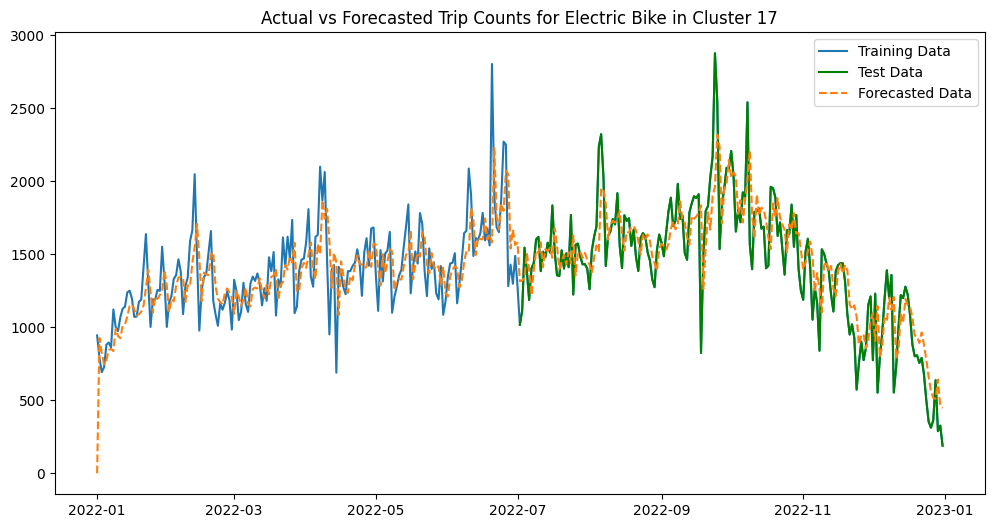

In [ ]:
# Call the function to plot for cluster 0, electric bike
demand_forecasting_with_trend(17, 'electric_bike')

In [ ]:
#(6, 'electric_bike'): {'order': (0, 1, 1),
#  'seasonal_order': (0, 0, 0, 0),
#  'aic': 1097.1439224242213},